### Problem Statement

India has been fighting the COVID-19 pandemic since 30 January 2020 when the first case of COVID-19 was reported. With the Unlock 4.0 phase set to begin in
September, the need to be proactive is now more than ever. The objective is to create a Real-Time Face Mask Detector which can solve monitoring issues in crowded
areas such as Airports, Metros, etc. using CNN and OpenCV

### Dataset Description

The dataset is an artificial set of face mask images

• Total Images: 1376

• with_mask images:

• without_mask images:

The goal is to create a Deep Learning model to detect in real-time whether a person is wearing a face mask or not

### Aim of the Project
The dataset consists of 1376 images consisting of two classes– with_mask and without_mask. The objective to create a Face Mask Detector using CNN and OpenCV.

### Task to be Performed

.ipynb file
As a part of this test, you will be performing the following tasks:

• Prepare a detailed python notebook using CNN for detecting Face Masks in Real-time

• Import Required Libraries

• Load and Pre-process the dataset

• Visualize the dataset

• Design a Convolutional Neural Network (CNN) Model

• Compile the Model

• Train the Model

• Evaluate the Model

• Detect the Face Masks using the HaarCascade_frontalface_default.xml file in real time

### Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Libraries

In [ ]:
# Import Required Libraries
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from os import listdir
import cv2
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense , Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg

In [ ]:
!unzip '/content/Mask_n.zip'

Archive:  /content/Mask_n.zip
  inflating: Mask_n/data.npy         
   creating: Mask_n/dataset/
   creating: Mask_n/dataset/with_mask/
  inflating: Mask_n/dataset/with_mask/0-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/100-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/101-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/103-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/104-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/105-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/106-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/107-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/108-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/109-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/10-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/110-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/111-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/112-with-mask.jpg  
  inflating: Mask_n/dataset/with_mask/113-with-mask.jpg

### Load and Preprocess

In [ ]:
data_path='/content/Mask_n/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with_mask': 0, 'without_mask': 1}
['with_mask', 'without_mask']
[0, 1]


In [ ]:
# print the number of images with and without face mask: 
print("The number of images with facemask labelled 'yes':",len(os.listdir('/content/Mask_n/dataset/with_mask')))
print("The number of images with facemask labelled 'no':",len(os.listdir('/content/Mask_n/dataset/without_mask')))

The number of images with facemask labelled 'yes': 690
The number of images with facemask labelled 'no': 686


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to

### Normalize and Resize

In [ ]:
# Normalize and Resize the images data
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

# save the numpy array
np.save('data',data)
np.save('target',new_target)

### Visualize

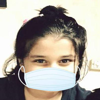

In [ ]:
# Visualize the dataset
im =Image.open('/content/Mask_n/dataset/with_mask/447-with-mask.jpg').resize((100,100))
im 

In [ ]:
# load the array:
data=np.load('/content/Mask_n/data.npy')
target=np.load('/content/Mask_n/target.npy')

In [ ]:
print(data.shape)
data.shape[1:]

(1376, 100, 100, 1)


(100, 100, 1)

### Split into Test and train

In [ ]:
# Split the data into training and test data:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1100, 100, 100, 1)
(276, 100, 100, 1)
(1100, 2)
(276, 2)


## Model

### Design Model

In [ ]:
# Design a Convolutional Neural Network (CNN) Model 
model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

### Compile Model

In [ ]:
# Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train Model

In [ ]:
training=model.fit(train_data,train_target,epochs=20,validation_data=(test_data,test_target ))

Epoch 1/20
35/35 [==============================] - 83s 2s/step - loss: 0.7049 - accuracy: 0.5418 - val_loss: 0.6412 - val_accuracy: 0.6920
Epoch 2/20
35/35 [==============================] - 81s 2s/step - loss: 0.5611 - accuracy: 0.7145 - val_loss: 0.5198 - val_accuracy: 0.7065
Epoch 3/20
35/35 [==============================] - 82s 2s/step - loss: 0.4333 - accuracy: 0.8145 - val_loss: 0.3169 - val_accuracy: 0.9058
Epoch 4/20
35/35 [==============================] - 86s 2s/step - loss: 0.3338 - accuracy: 0.8655 - val_loss: 0.2722 - val_accuracy: 0.8949
Epoch 5/20
35/35 [==============================] - 89s 2s/step - loss: 0.2486 - accuracy: 0.8964 - val_loss: 0.1995 - val_accuracy: 0.9457
Epoch 6/20
35/35 [==============================] - 82s 2s/step - loss: 0.2009 - accuracy: 0.9200 - val_loss: 0.1404 - val_accuracy: 0.9493
Epoch 7/20
35/35 [==============================] - 82s 2s/step - loss: 0.1590 - accuracy: 0.9391 - val_loss: 0.4645 - val_accuracy: 0.7500
Epoch 8/20
35/35 [==

## Visualize Model Performance

### Graphs

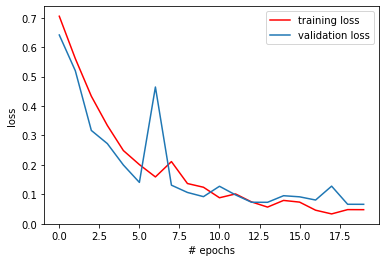

In [ ]:
# Performance Graphs:

from matplotlib import pyplot as plt

plt.plot(training.history['loss'],'r',label='training loss')
plt.plot(training.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Evaluate the model

In [ ]:
# Evaluate the Model 

print(model.evaluate(test_data,test_target))

9/9 [==============================] - 5s 550ms/step - loss: 0.0659 - accuracy: 0.9674
[0.06592078506946564, 0.967391312122345]


In [ ]:
image = np.asanyarray(im)

In [ ]:
img_height=100
img_width=100
mini=cv2.resize(image,(img_height, img_width))

### Detect the masks using HaarCascade

In [ ]:
labels_dict={0:'without_mask',1:'with_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 4
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror
    print(im)

    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

None


AttributeError: ignored